Bengaluru House Price Prediction

In [1]:
#Importing all the neccessary libraries:
# numpy: A fundamental package for scientific computing with Python. 
#It is used for working with arrays and provides a large collection of high-level mathematical functions 
#to operate on these arrays.

#pandas: # pandas: A powerful data analysis and manipulation library for Python. 
# It provides data structures like Series and DataFrame, which are essential for handling and analyzing structured data.

# matplotlib.pyplot: A plotting library for Python and its numerical mathematics extension, NumPy. 
# It is used for creating static, interactive, and animated visualizations in Python.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
# Reading the CSV file into a pandas DataFrame. 
# The read_csv function loads data from a CSV file into a DataFrame, a 2-dimensional labeled data structure 
# with columns of potentially different types.
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#drop society column because it's not required
data = data.drop(columns=['society','availability'],axis=1)

In [7]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07


In our dataset the column 'Total_Sqft' had alot of values which were in a range eg: 1000-2000, so in order to resolve that issue
Below code depicts that we have created a function where the function converts the strings to float

In [8]:
def convert_sqft_to_num(x):
    # Split the input string by the hyphen character '-'
    tokens = x.split('-')
    # If the resulting list has two elements, it means the input was a range (e.g., "1200-1300")
    if len(tokens) == 2:
        # Return the average of the two numbers in the range
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        # Attempt to convert the input string to a float
        return float(x)
    except:
        # If conversion fails, return None (this handles cases where the input is not a valid number or range)
        return None

In [9]:
# Apply the convert_sqft_to_num function to each entry in the total_sqft column.
# This will convert the values to numbers, handling any ranges or invalid entries.
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
# Filter out any rows where total_sqft couldn't be converted to a number and ended up as None.
# This ensures that we only keep rows with valid total_sqft values.
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [10]:
data.describe()

,total_sqft,bath,balcony,price
count,13274.000000,13201.000000,12669.000000,13274.000000
mean,1559.626694,2.691160,1.585682,112.453654
std,1238.405258,1.338867,0.816734,149.070368
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1276.000000,2.000000,2.000000,72.000000
75%,1680.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


Summary

1. House Sizes: The majority of the houses are between 1,100 and 1,680 square feet, with some extreme outliers on the higher end.
2. Bathrooms: Most houses have 2 or 3 bathrooms, but there are some with significantly more.
3. Balconies: Most houses have 1 or 2 balconies, with very few having none or more than 2.
4. Prices: The majority of house prices range from 50 to 120 lakhs, but there are some very high-priced houses.

In [11]:
data.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       605
price           0
dtype: int64

In [12]:
#Dropping the null values
data = data.dropna()

In [13]:
data.area_type.unique()

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

In [14]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [15]:
len(data.location.unique())

1259

In [16]:
# Group the data by the 'location' column and count the number of entries for each location.
# This gives us the number of houses available in each location.
#This means that all rows with the same location are grouped together.
location_count = data.groupby('location').size().sort_values(ascending=False)
location_count

location
Whitefield              513
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          259
Thanisandra             230
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Length: 1259, dtype: int64

This code is useful for understanding the distribution of house listings across different locations. By looking at the result, we can quickly identify which locations have the highest number of house listings in the dataset.

In [17]:
# Filter the location_count Series to get only those locations that have 10 or fewer houses listed..
len(location_count[location_count<=10])

1024

In [18]:
location_less_10 = location_count[location_count<=10]

In [19]:
#if the location have less than 10 or 10 houses than that location will be known as other location
data.location = data.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [20]:
len(data.location.unique())

236

In [21]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [22]:
# Convert the 'size' column to just the number of bedrooms.
# The 'size' column contains values like '2 BHK', '3 BHK', etc.
# This code extracts the numeric part of each entry and converts it to an integer.

# Apply a lambda function to each entry in the 'size' column.
# The lambda function splits the string by space (' ') and takes the first part (the number of bedrooms),
# then converts it to an integer.
data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0]))


In [23]:
data['size'].unique

<bound method Series.unique of 0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13317    2
13318    4
13319    1
Name: size, Length: 12668, dtype: int64>

In [24]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07


In [25]:
# Importing the Seaborn library for statistical data visualization.
import seaborn as sns

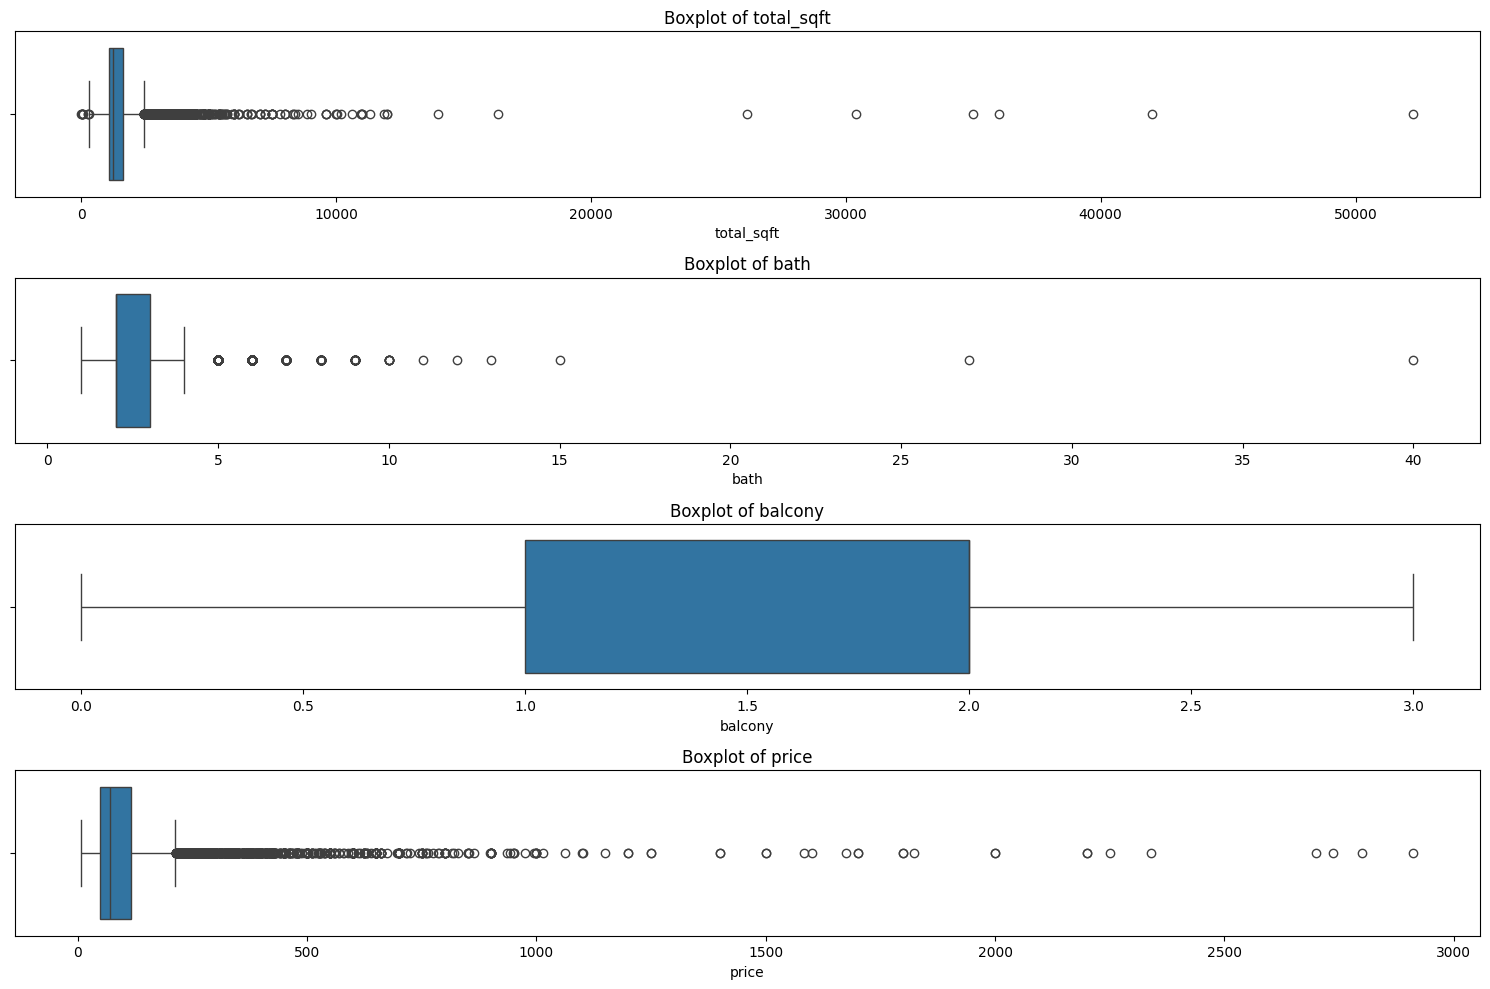

In [26]:
# List of numerical columns to visualize outliers
numeric_cols = ['total_sqft', 'bath', 'balcony', 'price']

# Set the plot size
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
#remove outlier using standard deviation
upper_limit = data.price.mean() + data.price.std()
lower_limit = data.price.mean() - data.price.std()
data = data[data.price<upper_limit] 
data = data[data.price > lower_limit]

In [28]:
upper_limit = data.total_sqft.mean() + data.total_sqft.std()
lower_limit = data.total_sqft.mean() - data.total_sqft.std()
data = data[data.total_sqft<upper_limit] 
data = data[data.total_sqft > lower_limit]

In [29]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07


In [30]:
import plotly.express as px
import plotly.graph_objs as go



# 1. Histogram using Plotly
fig_hist = px.histogram(data, x='price', nbins=50, title='Price Distribution')
fig_hist.show()

ModuleNotFoundError: No module named 'plotly'

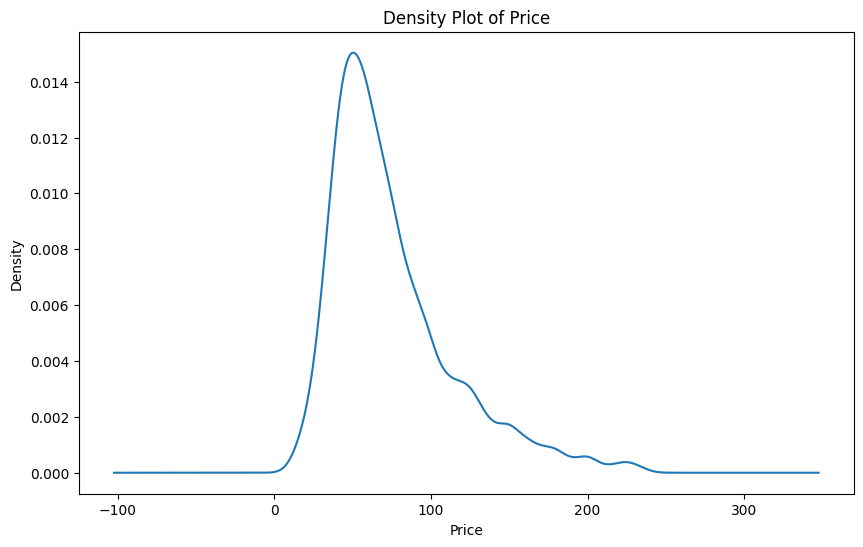

In [ ]:
# 3. Density Plot using Matplotlib
plt.figure(figsize=(10, 6))
data['price'].plot(kind='density')
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.show()

In [ ]:
# 1. Scatter Plot using Plotly
fig_scatter = px.scatter(data, x='total_sqft', y='price', color='location', title='Price vs Total Square Feet')
fig_scatter.show()

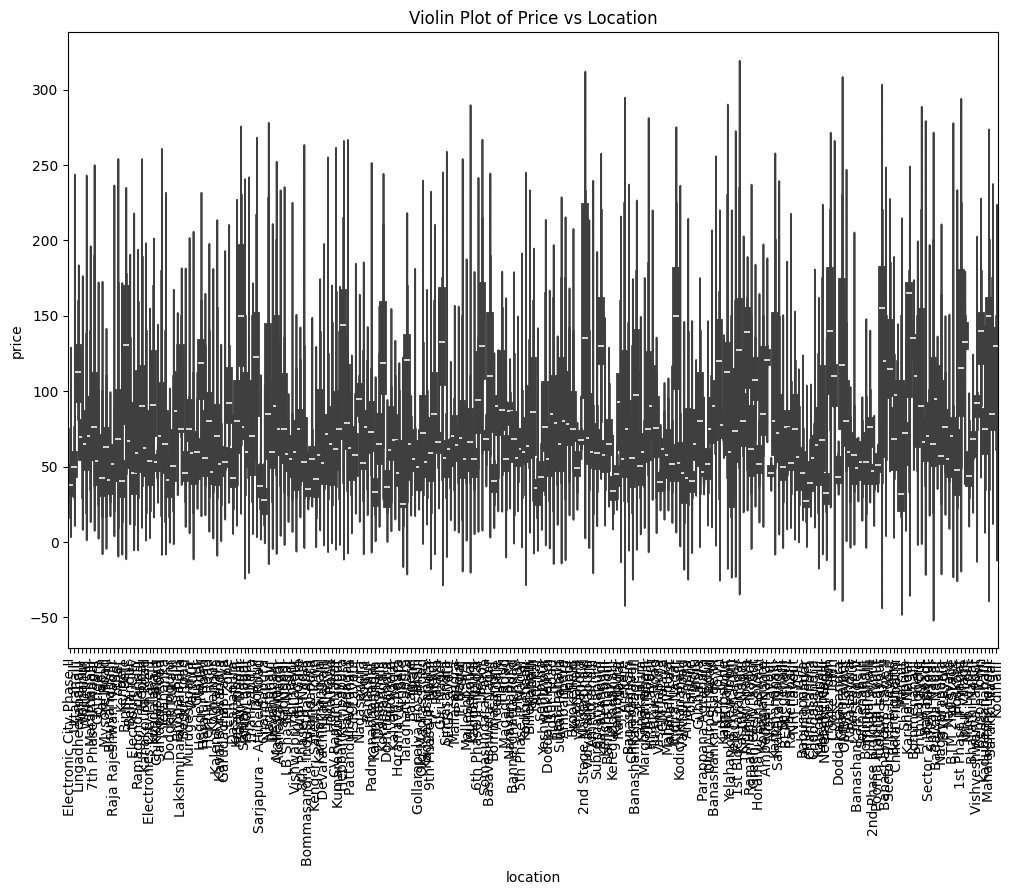

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='location', y='price', data=data)
plt.title('Violin Plot of Price vs Location')
plt.xticks(rotation=90)
plt.show()


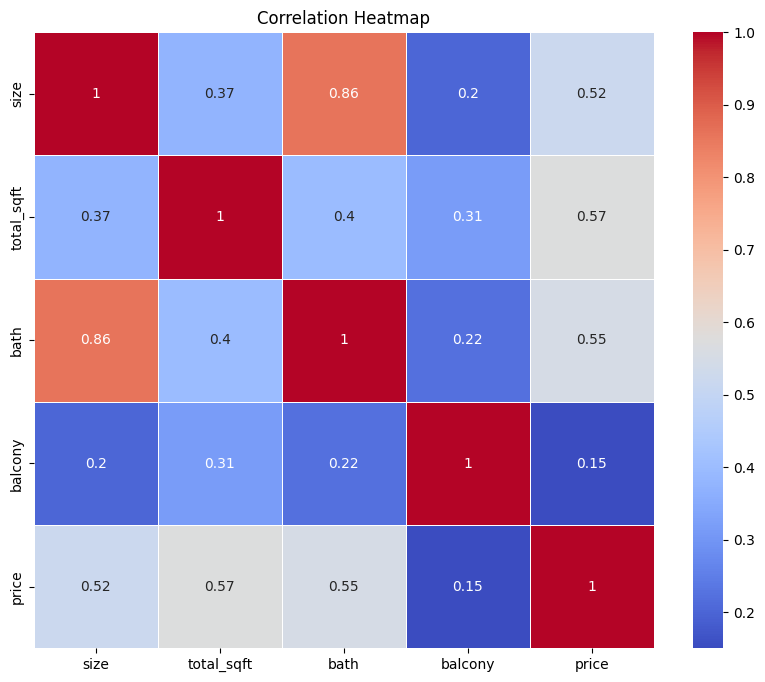

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6016 entries, 0 to 13317
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   6016 non-null   object 
 1   location    6016 non-null   object 
 2   size        6016 non-null   int64  
 3   total_sqft  6016 non-null   float64
 4   bath        6016 non-null   float64
 5   balcony     6016 non-null   float64
 6   price       6016 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 376.0+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# #split data into dependent feature & independent feature
# X = data.drop('price',axis=1)

In [ ]:
# y=data['price']

In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
# ohe=OneHotEncoder()
# ohe.fit(X[['area_type','location']])

OneHotEncoder()

In [ ]:
# column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['area_type','location']))

In [ ]:
# lr=LinearRegression()
# lr_pipe=make_pipeline(column_trans,lr)
# lr_pipe.fit(X_train,y_train)
# y_pred_lr=lr_pipe.predict(X_test)

In [ ]:
# r2_score_linear=r2_score(y_test,y_pred_lr)
# print("r2 score of Linear Regression Model is",r2_score_linear)

r2 score of Linear Regression Model is 0.2546512703827022


In [ ]:
# dt=DecisionTreeRegressor()
# dt_pipe=make_pipeline(column_trans,dt)
# dt_pipe.fit(X_train,y_train)
# y_pred_dt=dt_pipe.predict(X_test)

In [ ]:
# r2_score_dt=r2_score(y_test,y_pred_dt)
# print("r2 score of Decision Tree: ",r2_score_dt)

r2 score of Decision Tree:  0.25529489044567866


In [ ]:
# rf = RandomForestRegressor(random_state=0)
# pipe_rf = make_pipeline(column_trans, rf)
# pipe_rf.fit(X_train, y_train)
# y_pred_rf = pipe_rf.predict(X_test)


In [ ]:
# r2_randomforest=r2_score(y_test,y_pred_rf)
# print("r2 Score of Random Forest: ",r2_randomforest)

r2 Score of Random Forest:  0.25871232874483485


In [ ]:
# xg = XGBRegressor(random_state=0)
# pipe_xgb = make_pipeline(column_trans, rf)
# pipe_xgb.fit(X_train, y_train)
# y_pred_xgb = pipe_xgb.predict(X_test)

In [ ]:
# r2_score_xgb=r2_score(y_test,y_pred_xgb)
# print("r2 Score for xgboost: ",r2_score_xgb)

r2 Score for xgboost:  0.25871232874483485


In [ ]:
# meta_features = np.column_stack((y_pred_lr, y_pred_dt, y_pred_rf))

In [ ]:
# import xgboost as xgb

In [ ]:
# meta_model = xgb.XGBRegressor()
# meta_model.fit(meta_features, y_test)
# y_pred_stacked = meta_model.predict(meta_features)

In [ ]:
# r2_stacked = r2_score(y_test, y_pred_stacked)
# print("Stacked Model R-squared:", r2_stacked)

Stacked Model R-squared: 0.39689037259897064


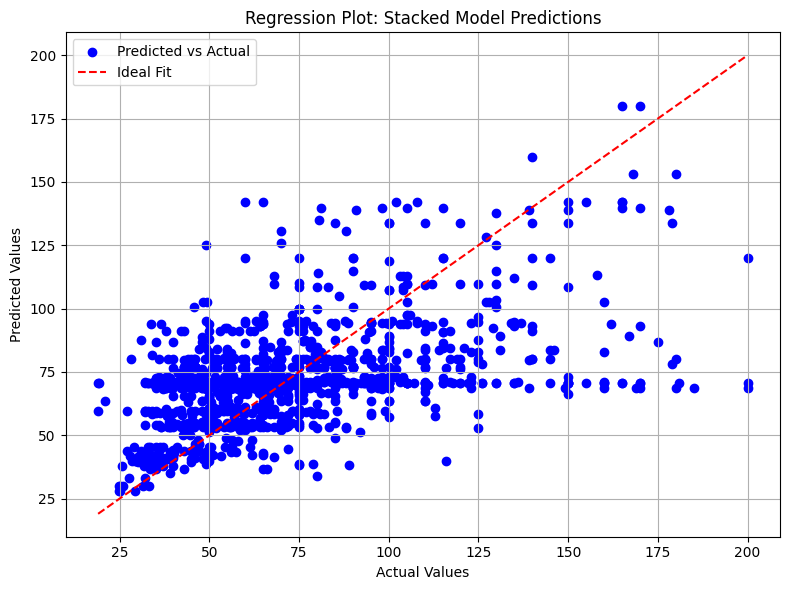

In [ ]:
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted vs Actual')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit')
# plt.title('Regression Plot: Stacked Model Predictions')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Split data into dependent and independent features
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# One-Hot Encoding
ohe = OneHotEncoder()
column_trans = make_column_transformer(
    (OneHotEncoder(), ['area_type', 'location']),
    remainder='passthrough'
)

# Define and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=0),
    'XGBoost': XGBRegressor(random_state=0)
}

for name, model in models.items():
    pipe = make_pipeline(column_trans, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R-squared: {score}")

# Train meta-model
y_pred_lr = models['Linear Regression'].predict(column_trans.transform(X_test))
y_pred_dt = models['Decision Tree'].predict(column_trans.transform(X_test))
y_pred_rf = models['Random Forest'].predict(column_trans.transform(X_test))

meta_features = np.column_stack((y_pred_lr, y_pred_dt, y_pred_rf))

meta_model = XGBRegressor(random_state=0)
meta_model.fit(meta_features, y_test)
y_pred_stacked = meta_model.predict(meta_features)

r2_stacked = r2_score(y_test, y_pred_stacked)
print("Stacked Model R-squared:", r2_stacked)


Linear Regression R-squared: 0.6310029465726306
Decision Tree R-squared: 0.4506507028709156
Random Forest R-squared: 0.60284969197938
XGBoost R-squared: 0.6548128433746665
Stacked Model R-squared: 0.9541540795387651


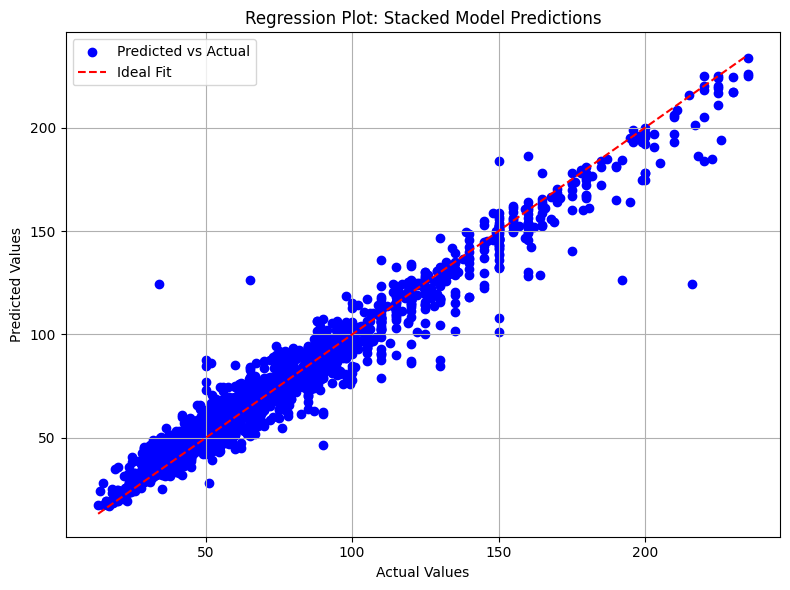

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_stacked, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Fit')
plt.title('Regression Plot: Stacked Model Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pipe=make_pipeline(column_trans,meta_model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['area_type', 'location'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categoric...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [ ]:
data.head(1)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07


In [ ]:
predicted_price=pipe.predict(pd.DataFrame([['Super built-up Area','Electronic City Phase II',2,105.6,2.0,1.0]],
                                          columns=['area_type','location','size','total_sqft','bath','balcony']))

In [ ]:
predicted_price

array([24.6143], dtype=float32)

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(meta_model, file)